In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [2]:
# Define paths to your dataset directories
train_dir = '/kaggle/input/undersample-majority/undersample_split/1.train'  # Replace with the actual path to your training data
val_dir = '/kaggle/input/undersample-majority/undersample_split/2.val'  # Replace with the actual path to your validation data

# Image parameters
img_height = 64  # Image height
img_width = 64   # Image width
batch_size = 32

# Set up ImageDataGenerators to load and preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories and apply transformations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Use 'categorical' if one-hot encoded
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Use 'categorical' if one-hot encoded
)


Found 467 images belonging to 7 classes.
Found 100 images belonging to 7 classes.


In [3]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # For a 7-class problem (adjust based on your dataset)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if one-hot encoding
              metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.1570 - loss: 1.9374 - val_accuracy: 0.2800 - val_loss: 1.8751
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 717ms/step - accuracy: 0.2401 - loss: 1.8489 - val_accuracy: 0.2400 - val_loss: 1.8040
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 678ms/step - accuracy: 0.3081 - loss: 1.6790 - val_accuracy: 0.3900 - val_loss: 1.5659
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 657ms/step - accuracy: 0.3999 - loss: 1.5261 - val_accuracy: 0.4800 - val_loss: 1.5148
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 706ms/step - accuracy: 0.4771 - loss: 1.4093 - val_accuracy: 0.4200 - val_loss: 1.4604
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 695ms/step - accuracy: 0.4988 - loss: 1.3516 - val_accuracy: 0.5500 - val_loss: 1.3384
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 709ms/step - accuracy: 0.5441 - loss: 1.2779 - val_accuracy: 0.4600 - val_loss: 1.3424
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 725ms/step - accuracy: 0.5383 - loss: 1.2433 - val_accuracy: 0.5800 -

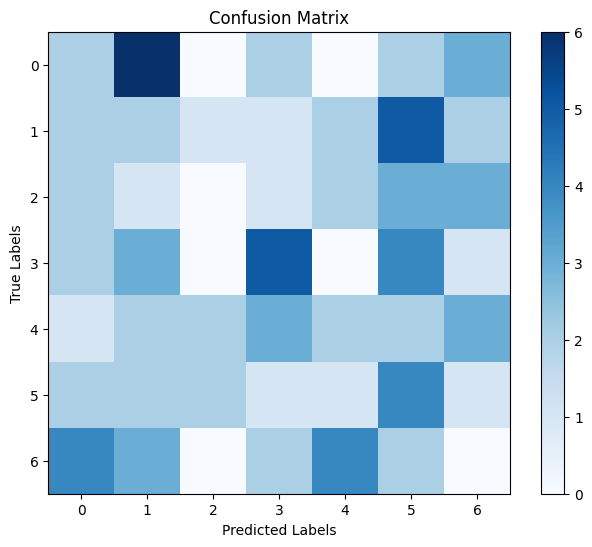

Learning Rate: 0.001
Training Rate: 0.5845824480056763


In [4]:
# Train the model using data generators
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model using validation data
y_pred = np.argmax(model.predict(val_generator), axis=-1)
y_true = val_generator.classes  # True labels from the validation generator

class_report = classification_report(y_true, y_pred, target_names=val_generator.class_indices)
print("Classification Report:")
print(class_report)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Sensitivity (Recall for each class)
sensitivity = recall_score(y_true, y_pred, average=None)

# Specificity (1 - False Positive Rate for each class)
specificity = 1 - (conf_matrix.sum(axis=0) - np.diagonal(conf_matrix)) / conf_matrix.sum(axis=0)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1 Score: {f1}")
print(f"Sensitivity (per class): {sensitivity}")
print(f"Specificity (per class): {specificity}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(train_generator.num_classes), np.arange(train_generator.num_classes))
plt.yticks(np.arange(train_generator.num_classes), np.arange(train_generator.num_classes))
plt.show()

# Learning rate and training rate
learning_rate = 0.001  # The learning rate you defined in the optimizer
training_rate = history.history['accuracy'][-1]  # Last epoch training accuracy
print(f"Learning Rate: {learning_rate}")
print(f"Training Rate: {training_rate}")


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Squeeze-and-Excitation (SE) Block
class SEBlock(layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(SEBlock, self).__init__()
        # Squeeze operation (global average pooling)
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        # Excitation operation (fully connected layers)
        self.fc1 = layers.Dense(channels // reduction_ratio, activation='relu')
        self.fc2 = layers.Dense(channels, activation='sigmoid')

    def call(self, inputs):
        # Squeeze step: Global average pooling across spatial dimensions
        squeeze = self.global_avg_pool(inputs)
        # Excitation step: Fully connected layers for channel recalibration
        excitation = self.fc1(squeeze)
        excitation = self.fc2(excitation)
        # Reshaping the excitation to match the channel dimension
        excitation = layers.Reshape((1, 1, inputs.shape[-1]))(excitation)
        # Apply channel-wise scaling (multiply with feature map)
        return inputs * excitation

# CNN Model with Channel Attention (SE Block)
def build_model_with_se_attention(img_height, img_width, num_classes):
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D((2, 2)),
        
        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Third convolutional block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Apply Squeeze-and-Excitation (SE) Block for Channel Attention
        SEBlock(128),  # Applying attention on the last convolution block
        
        # Flatten and Dense layers for classification
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Model Parameters
img_height, img_width = 64, 64  # Image dimensions (adjust according to your dataset)
num_classes = 7  # Number of output classes (e.g., for diabetic retinopathy classification)

# Build and compile the model
model = build_model_with_se_attention(img_height, img_width, num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ se_block (SEBlock)                   │ (None, 6, 6, 128)           │           2,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 686,287 (2.62 MB)

 Trainable params: 686,287 (2.62 MB)

 Non-trainable params: 0 (0.00 B)